In [31]:
import pandas as pd

students = pd.read_csv('student-mat.csv',delimiter=';')
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Text(0.5,1,'Distribution of Final Grades')

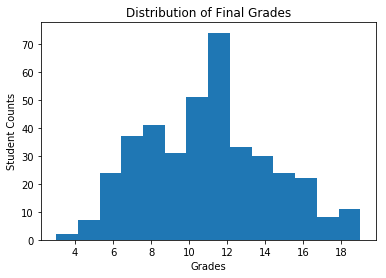

In [32]:
import matplotlib.pyplot as plt

## We will take G1 as Grade
plt.hist(students['G1'],bins=14)
plt.xlabel('Grades')
plt.ylabel('Student Counts')
plt.title('Distribution of Final Grades')

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


Text(0.5,1,'Density Plot of Final Grades by Location')

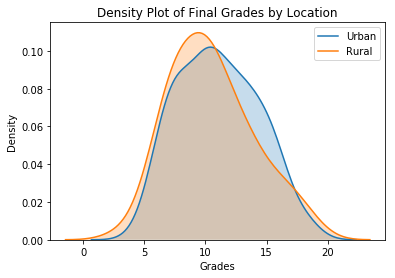

In [33]:
import seaborn as sns

# Make one plot for each different location
sns.kdeplot(students.ix[students['address'] == 'U', 'G1'], label = 'Urban', shade = True)
sns.kdeplot(students.ix[students['address'] == 'R', 'G1'], label = 'Rural', shade = True)

# Add labeling
plt.xlabel('Grades')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades by Location')

In [34]:
students.corr()['G1'].sort_values()

failures     -0.354718
goout        -0.149104
Walc         -0.126179
Dalc         -0.094159
traveltime   -0.093040
health       -0.073172
age          -0.064081
absences     -0.031003
freetime      0.012613
famrel        0.022168
studytime     0.160612
Fedu          0.190270
Medu          0.205341
G3            0.801468
G2            0.852118
G1            1.000000
Name: G1, dtype: float64

In [36]:
# Select only categorical variables
category_students = students.select_dtypes('object')

# One hot encode the variables
dummy_students = pd.get_dummies(category_students)

# Put the grade back in the dataframe
dummy_students['G1'] = students['G1']

# Find correlations with grade
dummy_students.corr()['G1'].sort_values()

schoolsup_yes       -0.212607
higher_no           -0.178264
Mjob_other          -0.164421
Fjob_other          -0.113924
sex_F               -0.091839
famsup_yes          -0.084569
internet_no         -0.071619
famsize_GT3         -0.071445
reason_course       -0.070957
address_R           -0.069704
nursery_no          -0.069263
Mjob_at_home        -0.057039
activities_no       -0.057010
paid_no             -0.039079
romantic_yes        -0.037188
guardian_other      -0.031022
school_MS           -0.025731
reason_home         -0.017198
Pstatus_T           -0.016868
Fjob_services       -0.015093
guardian_mother     -0.011767
reason_other        -0.007215
Pstatus_A            0.016868
school_GP            0.025731
guardian_father      0.033142
Fjob_health          0.035303
romantic_no          0.037188
paid_yes             0.039079
Fjob_at_home         0.055115
activities_yes       0.057010
nursery_yes          0.069263
address_U            0.069704
famsize_LE3          0.071445
internet_y

In [43]:
from sklearn.model_selection import train_test_split
# df is features and labels are the targets 

# Split by putting 25% in the testing set
X_train, X_test, y_train, y_test = train_test_split(students, test_size = 0.25, random_state=42)

ValueError: not enough values to unpack (expected 4, got 2)